# Life Expectancy and GDP
This portfolio project is using data provided by CodeAcademy and explores the interpaly between GDP and life expectancy in six different countries. Can GDP be a good indicator of life expectancy?

## Goals
- Load in our data
- Explore our data
- Explain our data
- Plot and visualize our data
- Create a Blog Post to share our findings. 

## Data
- Data provided by CodeAcademy in the form of the file `all_data.csv`
- Data provided was originally from WHO

## Analysis
- Summary statistics of each nation and aggregate nations
- Pearson Correlations between GDP and Life Expectancy by nation
- Data Visualizations such as: Line Plots, Bar Graphs, Scatter Plots, LM Plots

## Let's get started

In [34]:
#import our necessary modules, freeze the enviornment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
#load in the csv and print the head to inspect the data
#use .describe and .info to get even more information

df = pd.read_csv('all_data.csv')
print(df.head())
print(df.describe(), df.info())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
              Year  Life expectancy at birth (years)           GDP
count  

It looks like this dataset has 96 entries in it. Our .head() printed out only Chile as the country, which suggests this is in alphabetical order. Other coloumns include the GPD in US of the nations, years, and life expectency. 

Let's figure out what years and which countries this data covers.

In [3]:
start_year = df['Year'].min()
end_year = df['Year'].max()

list_of_countries = df['Country'].unique()
list_of_years = df['Year'].unique()
print(start_year, end_year, list_of_countries)

2000 2015 ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Now that we know our timeframe and which countries we will be dealing with, let's move on to start vizualizing this data. We could just print out the mins, maxes, and means, but it'll be more interesting to vizaulize these. 

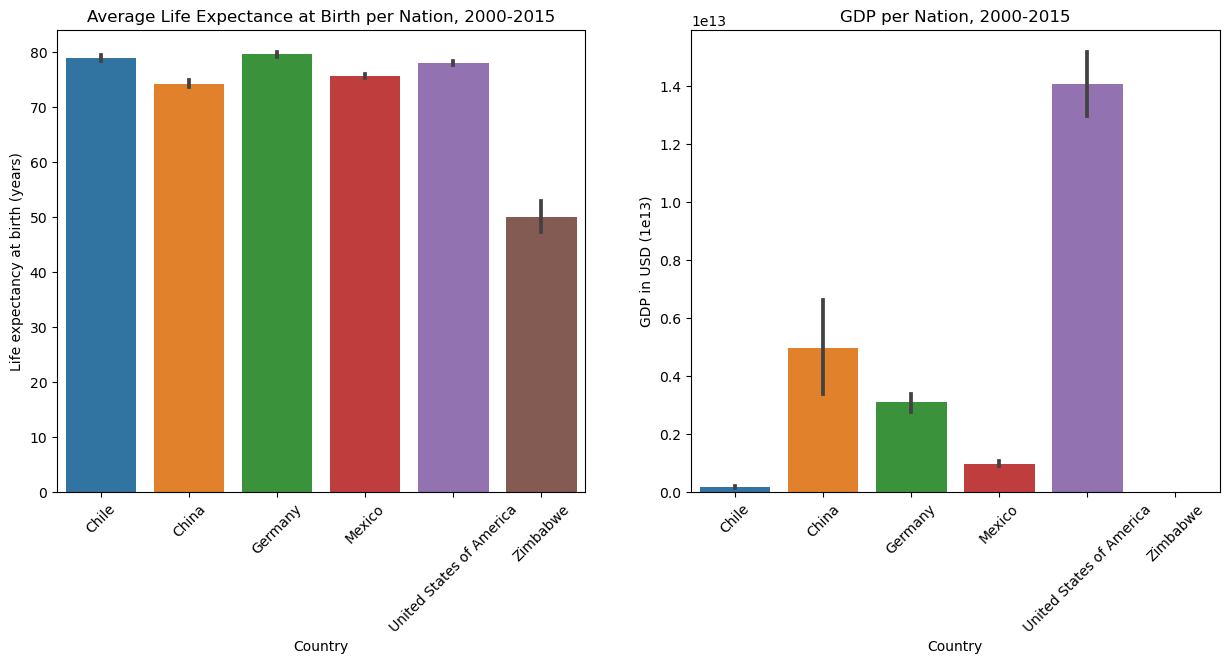

<Figure size 640x480 with 0 Axes>

In [4]:
#Looking at life expectancy only and GDP only
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x = 'Country', y = 'Life expectancy at birth (years)', data = df, ax=axs[0])
axs[0].set_title('Average Life Expectance at Birth per Nation, 2000-2015')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Life expectancy at birth (years)')
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(x = 'Country', y = 'GDP', data = df, ax=axs[1])
axs[1].set_title('GDP per Nation, 2000-2015')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('GDP in USD (1e13)')
axs[1].tick_params(axis='x', rotation=45)

plt.show()
plt.clf()

## Scatter Plot with Hue
Let's take a look at it all at once. We'll switch the axes to see if that provides more useful context.

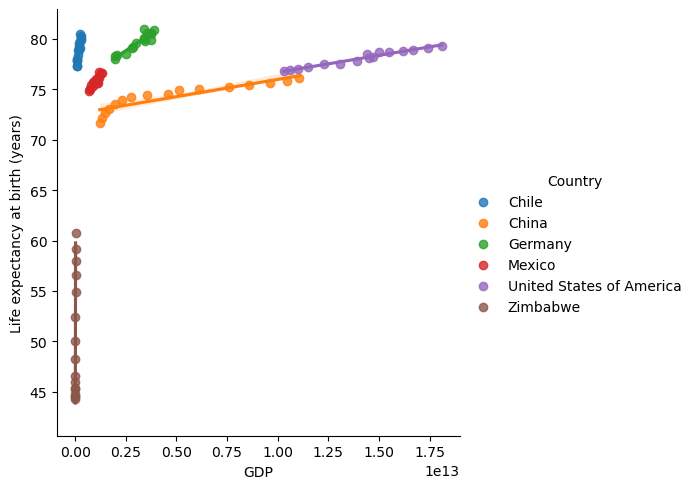

<Figure size 640x480 with 0 Axes>

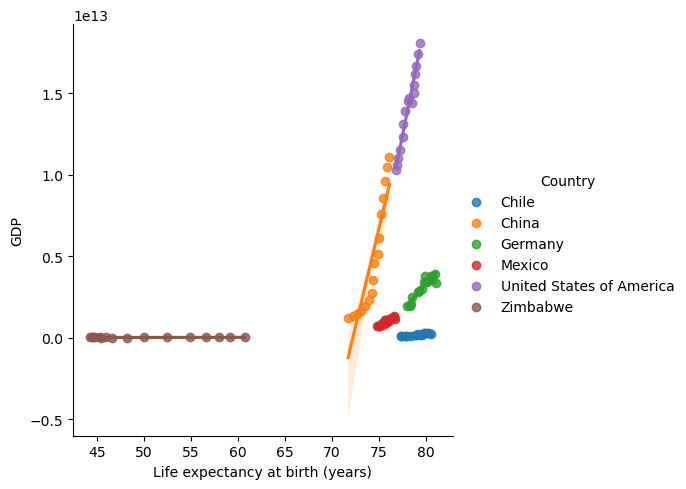

<Figure size 640x480 with 0 Axes>

In [6]:
sns.lmplot(x = 'GDP', y = 'Life expectancy at birth (years)', hue = 'Country', data = df)
plt.show()
plt.clf()

sns.lmplot(x = 'Life expectancy at birth (years)', y = 'GDP', hue = 'Country', data = df)
plt.show()
plt.clf()

The above charts aren't as helpful as they can be, but this does give us a glimpse of what may be going on: over time, life expectancy is growing. Let's take a look at that against time. 

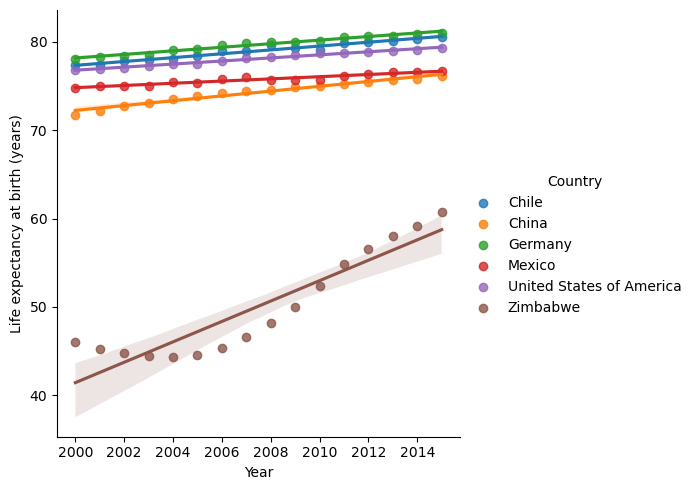

<Figure size 640x480 with 0 Axes>

In [7]:
sns.lmplot(x = 'Year', y = 'Life expectancy at birth (years)', hue = 'Country', data = df)
plt.show()
plt.clf()

While Zimbabwe may be an outlier here, time as positively affected all nations' life expectancy positively. We should take a look at the chart above next to a chart showing GDP over time to compare. 

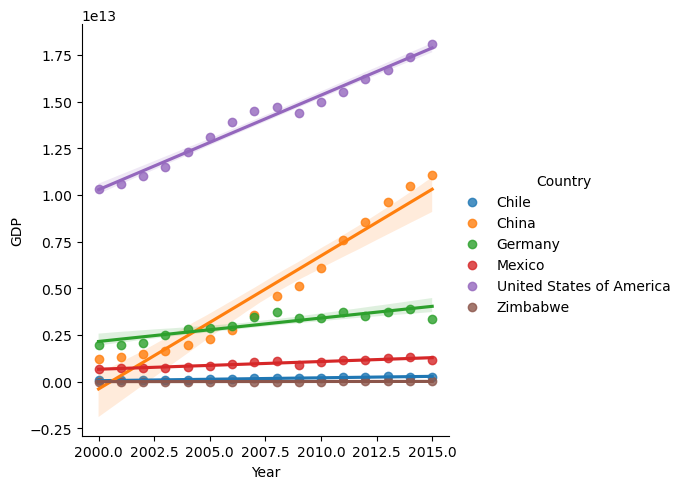

<Figure size 640x480 with 0 Axes>

In [8]:
sns.lmplot(x = 'Year', y = 'GDP', hue = 'Country', data = df)

plt.show()
plt.clf()

## Comparing GDP to Life Expectancy in Each Country
When placing all these countries on the same grpahs we run into some spacing issues. This may lead us to overlook the main relationship we are exploring with this dataset: GDP and Life Expectancy. 

Let's plot these six side by side to see them all at once. 

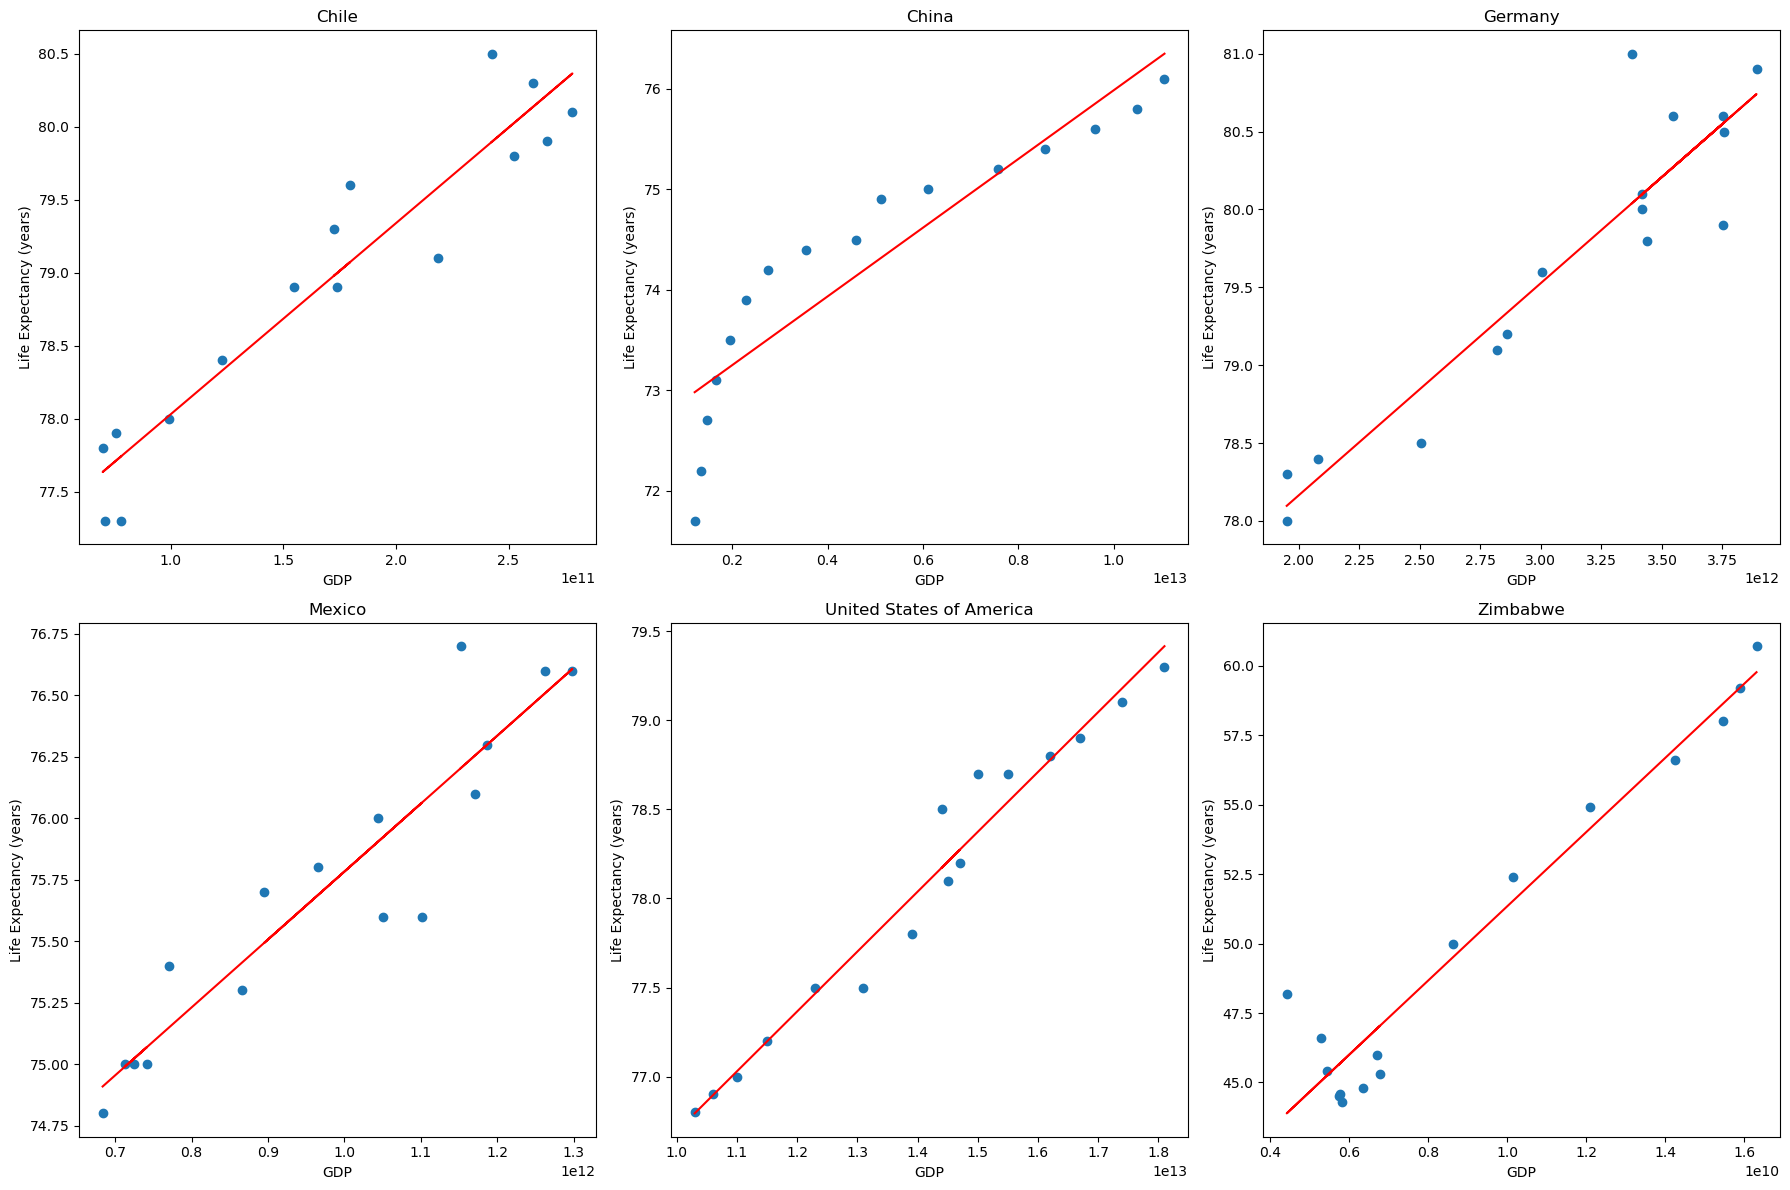

In [32]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs = axs.flatten()
for i, country in enumerate(list_of_countries):
    country_data = df[df['Country'] == country]
    gdp = country_data['GDP'].values.reshape(-1, 1)
    life_expectancy = country_data['Life expectancy at birth (years)']
    axs[i].scatter(gdp, life_expectancy)
    model = LinearRegression()
    model.fit(gdp, life_expectancy)
    regression_line = model.predict(gdp)
    axs[i].plot(gdp, regression_line, color='red', label=f'R²={model.score(gdp, life_expectancy):.2f}')
    axs[i].set_title(country)
    axs[i].set_xlabel('GDP')
    axs[i].set_ylabel('Life Expectancy (years)')    

plt.tight_layout()
plt.show()

These charts suggest a fairly strong positive correlation between GDP and Life Expectancy. But let's also run a Pearson correlation to give a numerical representation of this for each country. 

In [19]:
correlation_results = {}

for country in list_of_countries:
    country_data = df[df['Country'] == country]
    gdp = country_data['GDP']
    life_expectancy = country_data['Life expectancy at birth (years)']
    correlation, p_value = pearsonr(gdp, life_expectancy)
    correlation_results[country] = (correlation, p_value)

print(correlation_results)

{'Chile': (0.9498766659254416, 1.865913974658531e-08), 'China': (0.9085255408648358, 1.1250985720700642e-06), 'Germany': (0.9326988982561268, 1.401881553404592e-07), 'Mexico': (0.9322377167847081, 1.4686960248305143e-07), 'United States of America': (0.9817092382430257, 1.7499709269099464e-11), 'Zimbabwe': (0.9661998955858777, 1.2358516366846197e-09)}


All of these are within 10% of a positive 1 Pearson correlation. These two are highly correlated.

## Conclusion

In this project we explored a dataset outlining life expectancy and GDP by country. After calculating and sharing some summary statistic, as well as visualizing some of the dataset's features, we dove into the relationship between GDP and Life Expectancy. Importantly, we learned that our visualizations where we plotted all nations' data made it confusing to understand, but still provided some indication of the positive trend. This is likely due to the distance between Zimbabwe and other nations in this dataset, which distorted the visualizations. However, we were able to overcome this through numerical calculations and rethinking how we visualized the data. 

Based on our calculations and our visaulizations, the positive correlation between GDP and Life Expectancy regardless of nation is appartent. It is important to note that this is not necessarily causation. There may be many other things that come with a higher GDP that can account for better life outcomes. A few that come to mind immediately would be medicine, access to better food and cleaner water, and personal protective equipment. 

Ideally, I would like to research how those features would affect life expectancy within the same timeframe and add a greater number of nations (particularly ones that may be peers of Zimbabwe) to learn more about these relationships. 